## Imports

In [2]:
from  tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve

import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2022-12-30 09:52:34.351483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 09:52:34.594186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 09:52:34.594210: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-30 09:52:35.590398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## Dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Modelo

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2022-12-30 09:52:37.656768: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-30 09:52:37.656943: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-30 09:52:37.656963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (keven-b4dluck): /proc/driver/nvidia/version does not exist
2022-12-30 09:52:37.657641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=1)

## Treinamento

In [6]:
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=2, validation_data=(test_images, test_labels))

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4098 - accuracy: 0.8830 - val_loss: 0.2898 - val_accuracy: 0.9162
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3004 - accuracy: 0.9146 - val_loss: 0.2975 - val_accuracy: 0.9150


In [7]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


## Visualização

### Roc Curve

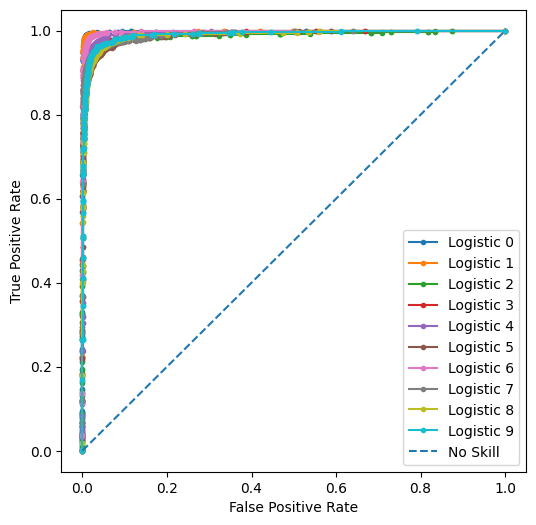

In [17]:
plt.subplots(1, figsize=(6, 6))

for i in range(10):
    lr_fpr, lr_tpr, _ = roc_curve(list(map(lambda x: 0 if x != i else 1, y_true)), y_pred[:, i])
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic ' + str(i))
    
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

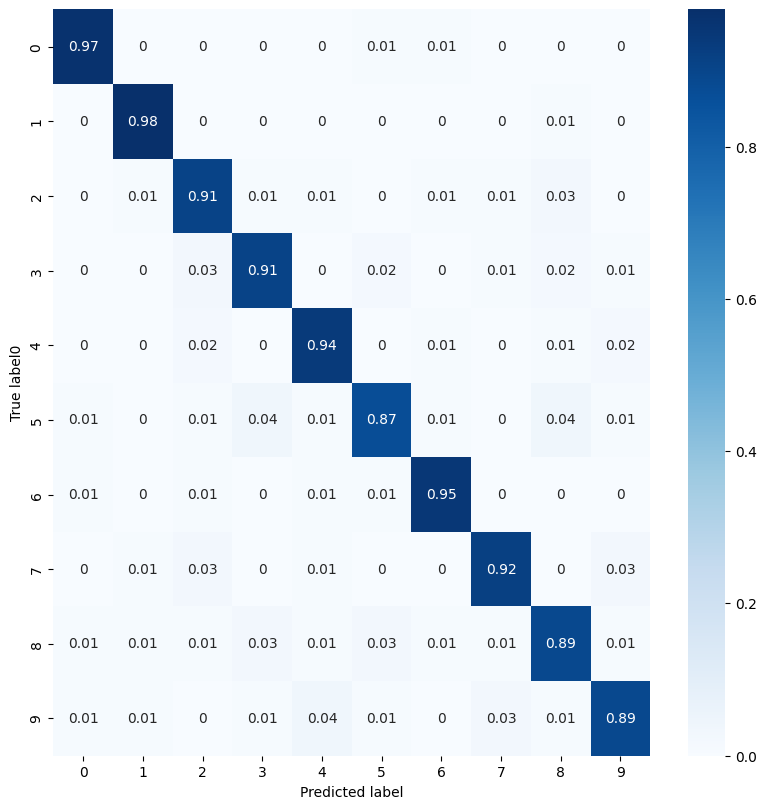

In [ ]:
figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_norm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label0')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fp = con_mat_norm.sum(axis=0) - np.diag(con_mat_norm)
fn = con_mat_norm.sum(axis=1) - np.diag(con_mat_norm)
tp = np.diag(con_mat_norm)
tn = con_mat_norm.sum() - (fp + fn + tp)

In [ ]:
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
f_score = np.around(2 * ((precision * sensitivity) / (precision + sensitivity)), decimals=2)